# Artificial neural network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ann import *
from classification_metrics import *

In [2]:
df = pd.read_csv("../data/wdbc_training.csv", decimal=",")
df

,﻿Malignant,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.25750,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.17410,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
394,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
395,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
396,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820


In [3]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X = np.asarray(X)
y = np.asarray(y)
print("y:", y)
print("X.shape:", X.shape)

y: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
X.shape: (398, 30)


In [4]:
def get_mean_std(X):
    return np.mean(X, axis=0), np.std(X, axis=0)

def normalization(X, means=None, sds=None):
    for j in range(X.shape[1]):
        if means is not None:
            X[:,j] = (X[:,j] - means[j])
        if sds is not None:
            X[:,j] = X[:,j] / sds[j]
    return X

In [5]:
means, sds = get_mean_std(X)
X = normalization(X, means=means, sds=sds) # zero mean and unit variance
print("Old standard deviations:", sds)
meansNew, sdsNew = get_mean_std(X)
print("Old means:", meansNew)
print("New standard deviations:", sdsNew)

Old standard deviations: [3.60758008e+00 4.23193247e+00 2.48294487e+01 3.60819284e+02
 1.33204940e-02 5.26644859e-02 8.15640958e-02 3.93213098e-02
 2.80800566e-02 6.88682797e-03 2.75759602e-01 5.65129576e-01
 2.01468136e+00 4.34077397e+01 3.07418623e-03 1.77866513e-02
 3.22355469e-02 6.46510407e-03 8.85391897e-03 2.66114183e-03
 4.93782730e+00 6.14388681e+00 3.41077493e+01 5.79671035e+02
 2.19519403e-02 1.53410996e-01 2.08428156e-01 6.56789751e-02
 6.39388175e-02 1.78126246e-02]
Old means: [ 5.53437809e-16  3.57056651e-17  1.03546429e-15 -4.73100063e-16
  3.21350986e-16  1.78528326e-17  3.57056651e-17  1.78528326e-17
  2.85645321e-16 -5.44511393e-16  1.78528326e-16  4.93184499e-16
 -1.42822660e-16  1.24969828e-16  6.69481221e-17 -3.57056651e-17
 -2.67792488e-17 -1.16043412e-16 -1.29433036e-16  8.92641628e-18
  2.05307574e-16 -3.57056651e-17 -2.32086823e-16  1.42822660e-16
  8.03377465e-16 -1.78528326e-17  8.92641628e-17 -1.78528326e-17
  1.96381158e-16 -1.01761146e-15]
New standard dev

In [6]:
def train_model(X, y, hidden_neurons, T, alpha, earlyStopping):
    np.random.seed(777)
    parameters = initialize_weights(X, hidden_neurons) # randomly initialize parameters
    loss = []
    l_last = np.infty
    for t in range(T):
        A1, A2 = vectorized_forward_propagation(X, parameters)
        l = np.sum((A2[0] - y)**2) / X.shape[0] # loss
        ### exercise: implement earlyStopping. When the difference between the current loss and the last loss 
        ### was below 1e-5 ten times in a row, then stop early (break the for loop)
        if earlyStopping and l_last - l < 1e-5:
            conv += 1
        else:
            conv = 0
        if conv >= 10:
            print("Converged at t:", t)
            break        
        l_last = l
        loss.append(l)
        parameters = vectorized_backward_propagation(X, y, A1, A2, parameters, alpha=alpha)
    return loss, parameters

Converged at t: 4247


Text(0, 0.5, 'SSE')

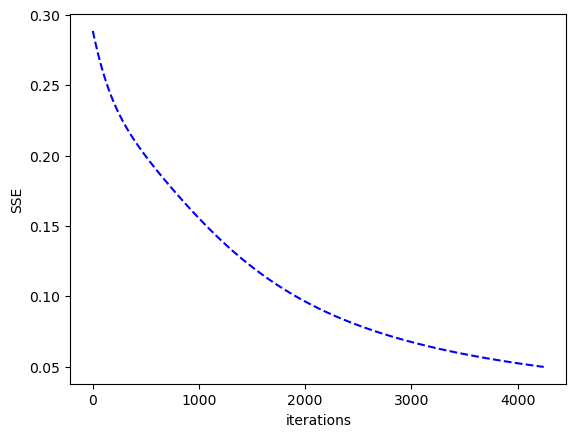

In [7]:
loss, parameters1 = train_model(X, y, 5, 10000, 0.01, True)
plt.plot(range(len(loss)), loss, '--b')
plt.xlabel("iterations")
plt.ylabel("SSE")

Text(0, 0.5, 'SSE')

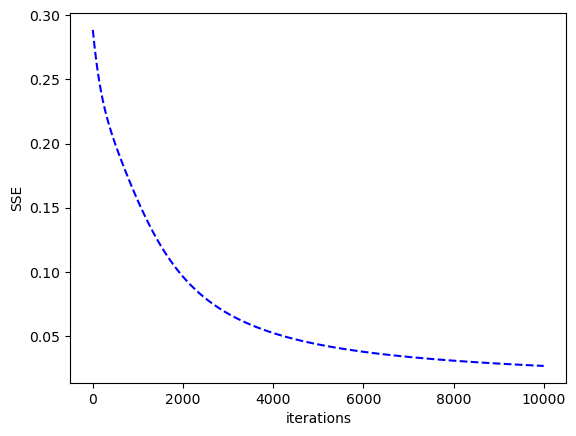

In [8]:
loss, parameters2 = train_model(X, y, 5, 10000, 0.01, False)
plt.plot(range(len(loss)), loss, '--b')
plt.xlabel("iterations")
plt.ylabel("SSE")

In [9]:
df_test = pd.read_csv("../data/wdbc_test.csv", decimal=",")
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
print("y:", y_test)
print("X.shape:", X_test.shape)

y: [1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1]
X.shape: (171, 30)


In [10]:
X_test = normalization(X_test, means=means, sds=sds) # (close to) zero mean and unit variance

In [11]:
def test_model(X_test, y_test, parameters):
    A1, A2 = vectorized_forward_propagation(X_test, parameters)
    # get predictions
    yhat_test = (np.array(A2[0]) >= 0.5).astype(int)
    classes, X2 = confusion_matrix(y_test, yhat_test)
    return accuracy(X2)

In [12]:
test_model(X_test, y_test, parameters1)

0.9590643274853801

In [13]:
test_model(X_test, y_test, parameters2)

0.9883040935672515

# Results with sklearn library

In [14]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation="logistic", solver='sgd', alpha=0.01, hidden_layer_sizes=(5), random_state=777, verbose=False, 
                    batch_size=X.shape[0], max_iter=10000, tol=1e-5)
clf.fit(X, y)
print(clf.score(X_test, y_test))

0.9883040935672515
